In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv(r"F:\Analytix Lab\Datasets\Housing_data\USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


#### Renaming Col names

In [3]:
df = df.rename(columns={'Avg. Area Income':'Income', 'Avg. Area House Age':'Age_house','Avg. Area Number of Rooms':'Room_num',
                  'Avg. Area Number of Bedrooms':'Bedroom_num','Area Population':'Population'})
df.head()

,Income,Age_house,Room_num,Bedroom_num,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

In [5]:
# Checking datatypes of variables
df.dtypes

Income         float64
Age_house      float64
Room_num       float64
Bedroom_num    float64
Population     float64
Price          float64
Address         object
dtype: object

In [6]:
## Checking for missing values
df.isna().sum()

Income         0
Age_house      0
Room_num       0
Bedroom_num    0
Population     0
Price          0
Address        0
dtype: int64

In [7]:
## Checking for any Outliers
def Plot_box_plot(x):
    sns.boxplot(y = x, data=df)
    plt.show()

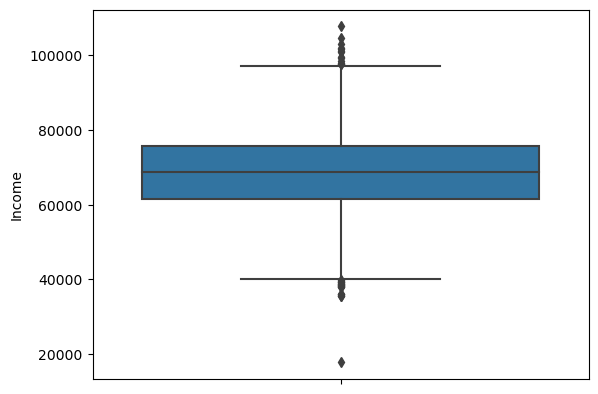

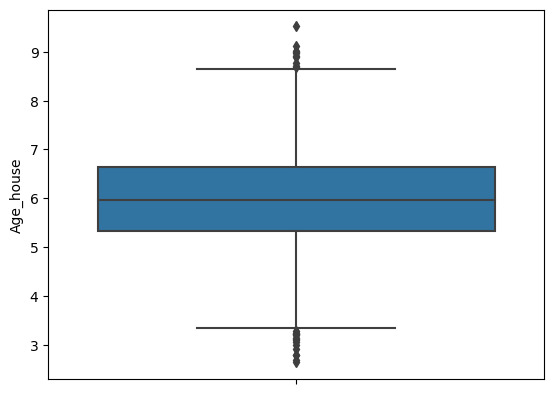

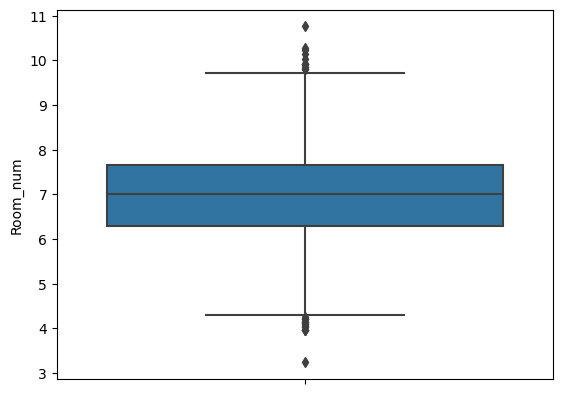

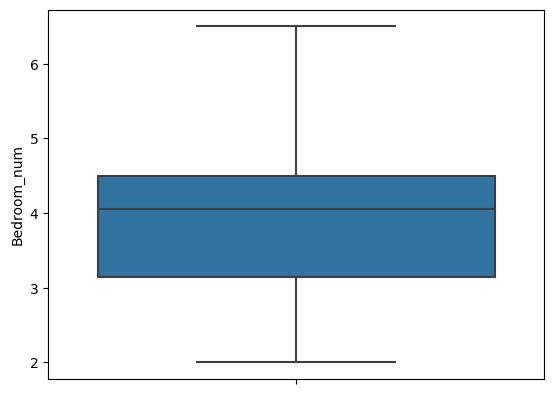

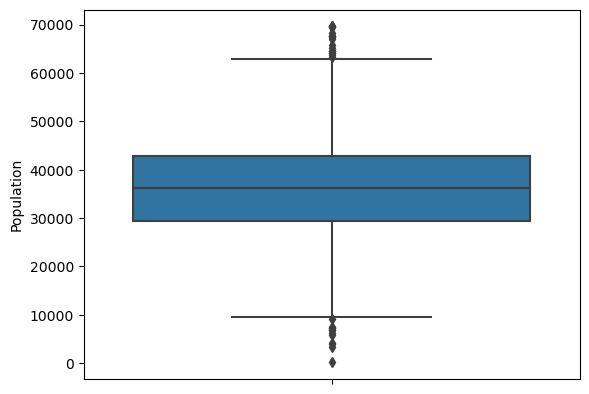

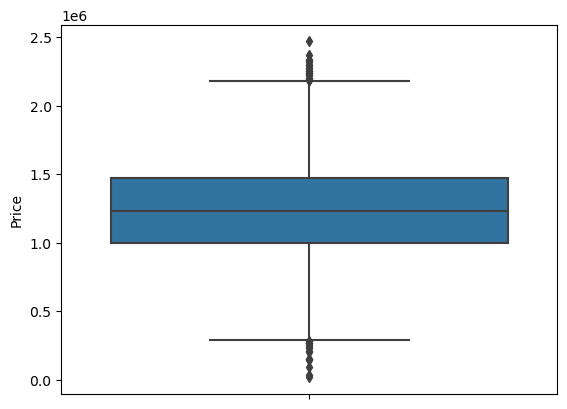

Income         None
Age_house      None
Room_num       None
Bedroom_num    None
Population     None
Price          None
dtype: object

In [8]:
df.select_dtypes('number').apply(Plot_box_plot)

In [9]:
df.select_dtypes('number').describe([0.01,0.05,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,50%,90%,95%,99%,max
Income,5000.0,6.858311e+04,10657.991214,17796.631190,43792.673024,50768.210439,6.880429e+04,8.208119e+04,8.626243e+04,9.376370e+04,1.077017e+05
Age_house,5000.0,5.977222e+00,0.991456,2.644304,3.648537,4.316475,5.970429e+00,7.243978e+00,7.609823e+00,8.274282e+00,9.519088e+00
Room_num,5000.0,6.987792e+00,1.005833,3.236194,4.620750,5.331007,7.002902e+00,8.274222e+00,8.610227e+00,9.295532e+00,1.075959e+01
Bedroom_num,5000.0,3.981330e+00,1.234137,2.000000,2.020000,2.150000,4.050000e+00,6.100000e+00,6.290000e+00,6.460000e+00,6.500000e+00
Population,5000.0,3.616352e+04,9925.650114,172.610686,13983.282591,19902.850077,3.619941e+04,4.881362e+04,5.266009e+04,5.997511e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,404973.038260,651745.532326,1.232669e+06,1.684621e+06,1.813570e+06,2.050598e+06,2.469066e+06


In [10]:
## Treating Outlire with Percentile method

def treat_outlier(x):
    if x.dtype == 'number':
        x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99) )
    return x

In [11]:
df = df.apply(treat_outlier)
df

,Income,Age_house,Room_num,Bedroom_num,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


<AxesSubplot:>

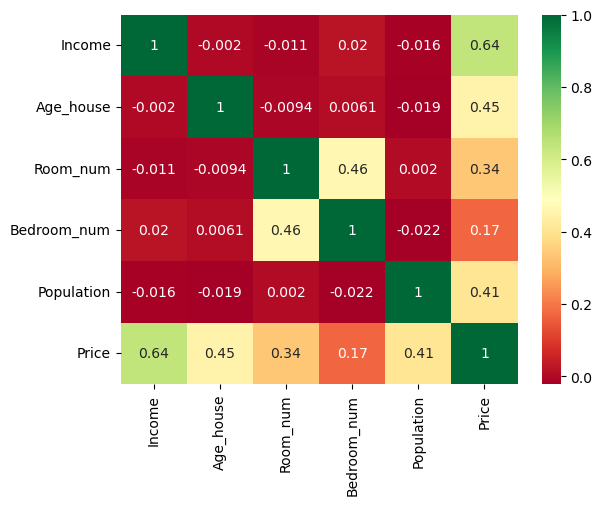

In [12]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='RdYlGn' )

#### Importing Machine Learning packages

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [14]:
df.head(2)

,Income,Age_house,Room_num,Bedroom_num,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [17]:
## Splitting variables in X and y
X = df.drop(columns=['Price','Address'])
y = df['Price']

In [18]:
## Splitting into train and test
train_X, test_X, train_y,test_y = train_test_split(X,y, test_size=0.3, random_state=121)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(3500, 5)
(3500,)
(1500, 5)
(1500,)


In [36]:
model_0 = RandomForestRegressor(max_depth=5)
model_0.fit(train_X,train_y)

RandomForestRegressor(max_depth=5)

In [37]:
train_y_pred = model_0.predict(train_X)
test_y_pred = model_0.predict(test_X)

In [38]:
print("MAPE error for train data is: ",mean_absolute_percentage_error(train_y, train_y_pred))
print("MAPE error for test data is: ",mean_absolute_percentage_error(test_y, test_y_pred))

MAPE error for train data is:  0.13035946948399535
MAPE error for test data is:  0.13369865284043428


#### Finding Best Parameter with GridSearchCV

In [47]:
param_grid = [{'n_estimators' : [100,200,400,500],
               'max_depth': [5,7,8,9,10],
#              'min_samples_split': [2,4,6]
           }]

In [48]:
model_1 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
             scoring = 'neg_mean_squared_error', cv=5, verbose=1)
model_1.fit(train_X, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 7, 8, 9, 10],
                          'n_estimators': [100, 200, 400, 500]}],
             scoring='neg_mean_squared_error', verbose=1)

In [51]:
## Best parameter which we got
model_1.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [56]:
train_y_pred = model_1.predict(train_X)
test_y_pred = model_1.predict(test_X)

In [57]:
print("MAPE error for train data is: ",mean_absolute_percentage_error(train_y, train_y_pred))
print("MAPE error for test data is: ",mean_absolute_percentage_error(test_y, test_y_pred))

MAPE error for train data is:  0.05507688290065022
MAPE error for test data is:  0.09251267580456975


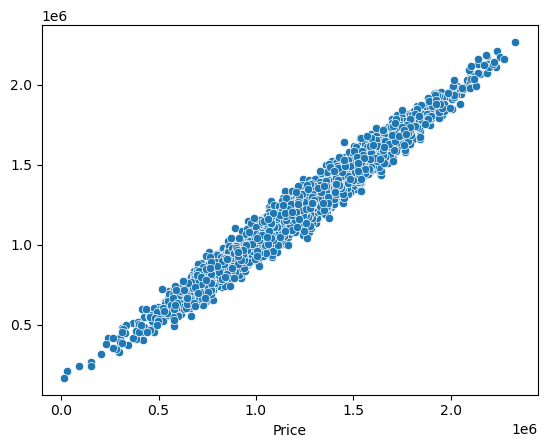

In [59]:
sns.scatterplot(x = train_y, y = train_y_pred)
plt.show()

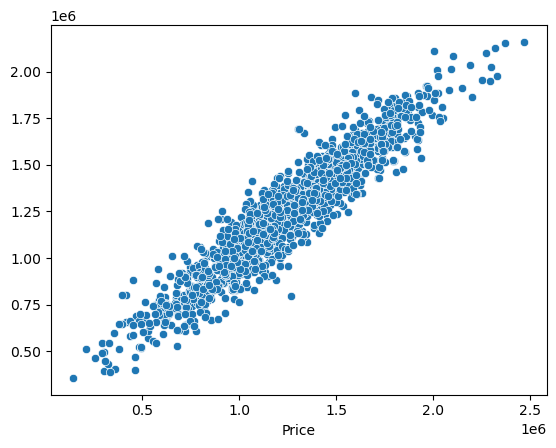

In [60]:
sns.scatterplot(x = test_y, y = test_y_pred)
plt.show()